# LOGISTIC REGRESSION

### CASE STUDY<br>
#### INTRODUCTION 
Social network advertising, also social media targeting, is a group of terms that are used to describe<br>
forms of online advertising that focus on social networking services. One of the major benefits of this<br> 
type of advertising is that advertisers can take advantage of the users’ demographic information and target<br>
their ads appropriately.Advantages are advertisers can reach users who are interested in their products,<br> 
allows for detailed analysis and reporting, information gathered is real, not from statistical projections,<br>
does not access IP-addresses of the users.<br>

#### OBJECTIVE<br>
Our field study concerns the dependence of purchase of product on gender , age , estimated salary of a person with given userID.Basically we need to build a logistic regression model which could predict whether a user is going to purchase based upon gender,age and salary

#### DATA<br>
Data contains 5 columns.<br>

   1. UserID - Each person has a unique ID from which we can identify the person uniquely.<br>

   2. Gender - Person can be male or female. This field is very important for our hypothesis.<br>

   3. Age - Age of the person. Because our product can be useful to some ages only.<br>

   4. EstimatedSalary - This column contains salary of a person as salary can affect the shopping of a person.<br>

   5. Purchased - Contains two numbers ‘0’ or ‘1’. ‘0’ means not purchased and ‘1’ means purchased.This variable is our   dependent variable.<br>


#### Import Packages
Pandas - pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.<br>

Numpy - NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.<br>

matplotlib & Seaborn - There are a comprehensive library for creating static, animated, and interactive visualizations in Python.<br>

<br>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Reading data from csv file

In [ ]:
social_media_ad_df = pd.read_csv('Social_Network_Ads.csv')
social_media_ad_df.head()

#### Get the basic information from the dataset like type,null values, column names etc

In [ ]:
social_media_ad_df.info()

#### Get the dimensions of the dataset

In [ ]:
social_media_ad_df.shape

## EDA(EXPLORATORY DATA ANALYSIS)

### Univariate Analysis

In [ ]:
social_media_ad_df['Purchased_cat'] = np.where(social_media_ad_df['Purchased']==1,"Yes","No")

#### Distribution of number of people purchased 
Number of people who didnot purchased were more than the number of people who purchased

In [ ]:
plt.figure(figsize=(6,4))
plt.title("Distribution of the number of people purchased")
sns.countplot(x=social_media_ad_df['Purchased_cat'],data=social_media_ad_df)
plt.show()

In [ ]:
social_media_ad_df['Purchased'].value_counts(normalize=True)*100

#### Distribution by Gender
In the sample dataset there are more records of female customer

In [ ]:
plt.figure(figsize=(6,4))
plt.title("Distribution of Gender")
sns.countplot(x=social_media_ad_df['Gender'],data=social_media_ad_df)
plt.show()

#### Distribution of Salary

Salary is normaly distributed with mean and median around 75000 cad

In [ ]:
sns.displot(social_media_ad_df['EstimatedSalary'],kind="kde")
plt.title("Distribution of Salary")

#### Distribution of Age


Text(0.5, 1.0, 'Distribution of Age')

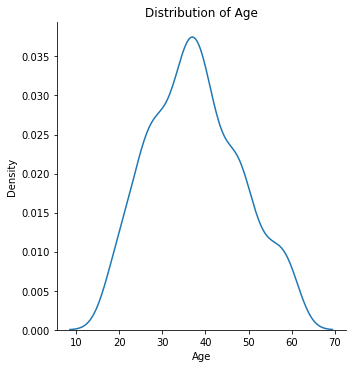

In [157]:
sns.displot(social_media_ad_df['Age'],kind="kde")
plt.title("Distribution of Age")

#### BIvariate Analysis

#### Age vs Purchased

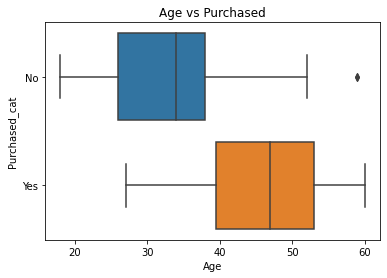

In [158]:
plt.figure(figsize=(6,4))
plt.title("Age vs Purchased")
sns.boxplot(x=social_media_ad_df['Age'],y=social_media_ad_df['Purchased_cat'],data=social_media_ad_df)
plt.show()

#### Salary vs Purchased

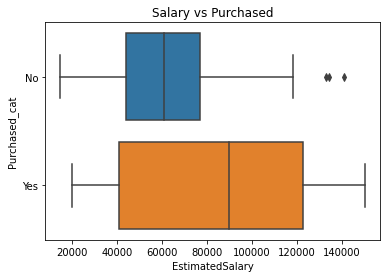

In [159]:
plt.figure(figsize=(6,4))
plt.title("Salary vs Purchased")
sns.boxplot(x=social_media_ad_df['EstimatedSalary'],y=social_media_ad_df['Purchased_cat'],data=social_media_ad_df)
plt.show()

#### Age vs Salary vs Purchased

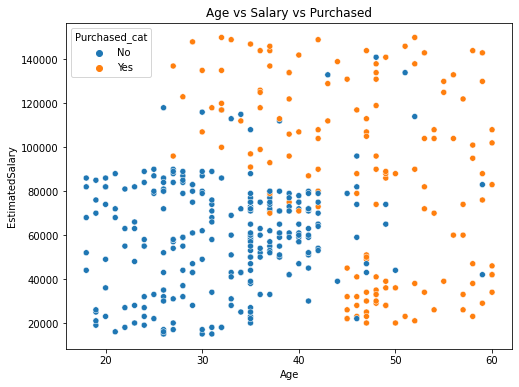

In [160]:
plt.figure(figsize=(8,6))
plt.title("Age vs Salary vs Purchased")
sns.scatterplot(x=social_media_ad_df['Age'],y=social_media_ad_df['EstimatedSalary'],hue=social_media_ad_df['Purchased_cat'])
plt.show()

#### Gender vs Purchased

<AxesSubplot:title={'center':'Gender vs Purchased'}, xlabel='Gender', ylabel='count'>

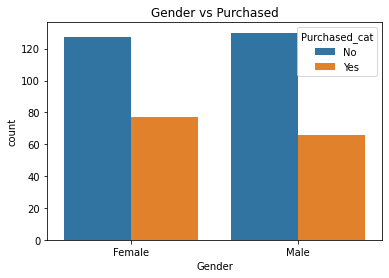

In [173]:
df = social_media_ad_df.groupby(['Gender','Purchased_cat']).agg(count = ('User ID','count'))
df = df.reset_index()
plt.title("Gender vs Purchased")
sns.barplot(x=df['Gender'],y='count',data=df,hue=df['Purchased_cat'])

### Observations

1. Female has higher probability of purchasing than male
2. Older users with higher income have a higher probability to purchase

#### Feature Scaling

In [162]:
temp1_df = social_media_ad_df[['User ID','Age','EstimatedSalary']]
temp1_df.set_index('User ID',inplace=True)
temp2_df = social_media_ad_df[['User ID','Gender','Purchased']]
temp2_df.set_index('User ID',inplace=True)

In [163]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
temp1_df = pd.DataFrame(scaler.fit_transform(temp1_df),index=temp1_df.index,columns=temp1_df.columns)

In [164]:
masterdata_df = pd.concat([temp1_df, temp2_df], axis=1, join="inner")
masterdata_df.head()

,Age,EstimatedSalary,Gender,Purchased
User ID,,,,
15624510,-1.781797,-1.490046,Male,0
15810944,-0.253587,-1.460681,Male,0
15668575,-1.113206,-0.785290,Female,0
15603246,-1.017692,-0.374182,Female,0
15804002,-1.781797,0.183751,Male,0


#### Creating Dummy Variable

In [165]:
map_dic = {'Female':0,'Male':1}
masterdata_df['Gender_numerical'] = masterdata_df['Gender'].map(map_dic)
masterdata_df = masterdata_df.reset_index()
masterdata_df = masterdata_df[['Age','EstimatedSalary','Gender_numerical','Purchased']]

## Model Building

#### Preparing the Dataset 

In [166]:
X = masterdata_df.drop(columns="Purchased")
y = masterdata_df['Purchased']

#### Dividing the data into training and test

In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

#### Performing Logistic Regression & Model Evaluation

Explanation of some of the terms in the summary table:

1) <b>coef</b> : the coefficients of the independent variables in the regression equation.<br>
2) <b>Log-Likelihood</b> : the natural logarithm of the Maximum Likelihood Estimation(MLE) function.<br>
    MLE is the optimization process of finding the set of parameters that result in the best fit.<br>
3) <b>LL-Null</b> : the value of log-likelihood of the model when no independent variables<br>
    included(only an intercept is included).<br>
4) <b>Pseudo R-squ</b> : a substitute for the R-squared value in Least Squares linear regression.<br>
    It is the ratio of the log-likelihood of the null model to that of the full model.<br>

In [168]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.398346
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.383     
Dependent Variable: Purchased        AIC:              260.9416  
Date:               2021-11-17 00:10 BIC:              272.2466  
No. Observations:   320              Log-Likelihood:   -127.47   
Df Model:           2                LL-Null:          -206.56   
Df Residuals:       317              LLR p-value:      4.5010e-35
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Age                2.0149   0.2510  8.0281 0.0000  1.5230  2.5068
EstimatedSalary    1.1494   0.1999  5.7486 0.0000  0.7575  1.5413


#### Fitting the Logistic Regression model

In [169]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

#### Predictions

In [170]:
y_pred = lr_model.predict(X_test)

### Evaluation

#### Confusion matrix and classification report

<img src="Capture.JPG" style="float: center;" alt="Confusion matrix" width="500"/>
<b>Positive (P)</b>: Observation is positive (eg. Purchased).<br>
<b>Negative (n)</b>: Observation is not positive (eg. not Purchased).<br>
<b>True Positive (TP)</b>: Outcome where the model correctly predicts the positive class.<br>
<b>True Negative (TN)</b>: Outcome where the model correctly predicts the negative class.<br>
<b>False Positive (FP)</b>: Also called a type 1 error, an outcome where the model incorrectly predicts the positive class when it is actually negative.<br>
<b>False Negative (FN)</b>: Also called a type 2 error, an outcome where the model incorrectly predicts the negative class when it is actually positive.<br>

<b>Precision</b> : Also called Positive predictive value<br>
The ratio of correct positive predictions to the total predicted positives.<br>
TP/TP +FP<br>

<b>Recall</b> : Also called Sensitivity, Probability of Detection, True Positive Rate<br>
The ratio of correct positive predictions to the total positives examples.<br>
TP/TP + FN<br>

<b>F1 Score</b> :The F1 score is a measure of a test’s accuracy — it is the harmonic mean of precision and recall. <br>
It can have a maximum score of 1 (perfect precision and recall) and a minimum of 0. Overall, it is a measure<br>
of the preciseness and robustness of your model.<br>
2*(precision+recall)/(precision + recall)

<b>Accuracy</b>: This is simply equal to the proportion of predictions that the model classified correctly.<br>
(TP + TN)/(TP + TN + FP +FN)<br>

<b>Macro average</b> is the average of precision/recall/f1-score.

<b>Weighted average</b> is just the weighted average of precision/recall/f1-score.

              precision    recall  f1-score   support

           0       0.94      0.79      0.86        57
           1       0.62      0.87      0.73        23

    accuracy                           0.81        80
   macro avg       0.78      0.83      0.79        80
weighted avg       0.85      0.81      0.82        80



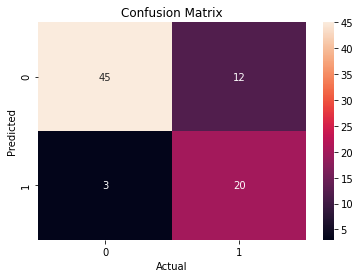

In [176]:
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(y_pred,y_test)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
print(classification_report(y_pred,y_test))